
# Using Machine Learning for the recommendation of plans for the company MEGALINE


Mobile company Megaline is not happy to see that many of its customers are using legacy plans, which are mobile plans that a person has had for a long time and are no longer available to new customers or users. We need to develop a model that can analyze customer behavior and recommend one of Megaline's new plans: Smart or Ultra.

We have access to behavioral data of subscribers who have already switched to the new plans. The classification model must choose the right plan for the customer based on their consumption habits.

Develop a model with the highest possible accuracy. In this project, the accuracy threshold is 0.75. Use the dataset to check the accuracy.

For the development of the model we will use the following machine learning algorithms:

- Decision Tree
- Random Forest

The overall data will be split into training, validation, and test sets. Both models will be trained and fine-tuned using the training and validation sets, with the goal of optimizing the hyperparameters to achieve maximum accuracy. Once the optimal hyperparameters are established, the models will be evaluated using the test set, and the one with the highest accuracy will be selected as the final model.

### 1.- IMPORTING LIBRARIES

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

### 2.- LOADING THE DATA

The csv file `users_behavior.csv` will be read and stored in the dataframe `df`.

In [3]:
df = pd.read_csv('M:/0. GIORGIO DOC/0. AUSTRALIA/COURSES/1. TRIPLETEN - DATA SCIENCE/9 SPRINT - INTRODUCTION TO MACHINE LEARNING/PROJECT SP9 ML MEGALINE/dataset/users_behavior.csv')

### 3.- EXPLORING THE DATA

In [4]:
# We show the data
print(df.info()) 
df.sample(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB
None


,calls,minutes,messages,mb_used,is_ultra
449,115.0,849.21,52.0,22433.77,1
1551,74.0,555.25,27.0,25718.19,1
593,96.0,679.61,19.0,16174.21,0
1338,71.0,452.15,39.0,16057.57,0
1911,62.0,423.82,16.0,8378.35,0
844,160.0,1055.79,54.0,33629.53,1
3206,76.0,586.51,54.0,14345.74,0
1990,94.0,748.25,8.0,18241.10,0
117,80.0,588.57,47.0,9863.23,0
1956,81.0,531.22,56.0,17755.06,0


Each column in the dataframe contains monthly behavior information about a user. The information given is as follows:

- `сalls` — number of calls.
- `minutes` — total duration of the call in minutes.
- `messages` — number of text messages.
- `mb_used` — Internet traffic used in MB.
- `is_ultra` — plan for the current month (Ultra - 1, Smart - 0).

The dataframe does not contain any missing `NAN` data and the data types match its characteristics.

## 4.- MODELING

We will use the following 2 algorithms:

- Decision Tree
- Random Forest

The model with the highest accuracy will be chosen for final testing. Models will be evaluated using the test data and their accuracy will be measured to determine their performance and which algorithm is superior.

### 4.1 Splitting data into dataset

The `is_ultra` column indicates the plan used by a customer, it contains a `0` if the `Smart` plan is used and a 1 if the `Ultra` plan is used. Since our goal is to recommend a plan to customers based on their data usage habits, the `is_ultra` column will be our `target` column. The other columns (`calls`, `minutes`, `messages`, `mb_used`) provide insights into each customer's data usage behavior and have some influence on their decision to sign up for the Smart or Ultra plan, so these columns will be our `features` columns.

In [5]:
# The characteristics of the data frame are included in all columns except the 'is_ultra' column.
# The axis = 1 parameter of the drop method is to delete a column.
features = df.drop('is_ultra', axis=1)

# The target of the dataframe is the column 'is_ultra'
target = df['is_ultra']

Since we do not have a test dataset `test` we must split the data of the features `features` and the target `target` into training `training`, validation `validation` and test `test` with a ratio of 3:1:1. Specifically the datasets `training`, `validation` and `test` consisting of `60%, 20% and 20%` of the `features` and `target` data respectively.

In [6]:
# We will split the training dataset into validation and test data.
# We will split the data as train and others with a ratio of 60% (0.6) to 40% (0.4)

features_train, features_other, target_train, target_other  = train_test_split(features, target, test_size=0.4,\
                                                              random_state=88888)

# Now we will divide features_others and target_others in validation and training data
# Since the others dataset represents 40% of the total data we must consider test_size= 0.5 for
# that the validation and testing dataset portion represents 20% of the total data

features_valid, features_test, target_valid, target_test = train_test_split(features_other, target_other,\
                                                           test_size=0.5, random_state=88888)


We will evaluate the `Decision Tree DT` and `Random Forest RF` algorithms to find the best models respectively considering an `accuracy` greater than `75% or 0.75`

### 4.2 Decision Tree Algorithm


The Decision Tree algorithm is a supervised learning model used for classification and regression tasks. It works by dividing the data set into smaller subsets using hierarchical decisions (in the form of nodes) based on the characteristics of the data. At the end of the tree branches are the predictions or results.

Since the `target` column has binary values, 0 or 1, the task of predicting the target values ​​is a `binary classification` task. A `Decision Tree` model is a suitable algorithm for this type of task. The maximum depth (`max_depth`) of the tree is a crucial hyperparameter in the decision tree model. Therefore, the following code block will create different models with different depth. The accuracy of each model will be evaluated and the model with the highest accuracy will be presented.

In [ ]:
# Initialization
best_model = None
best_DT_accuracy = 0.75
best_depth = 0

# We create different models with different depths values

# We use a FOR loop to evaluate different depth values ​​(from 1 to 100)
for depth in range(1,100):
    
    # We create the model by adjusting the hyperparameters max_depth and random_state
    DT_model = DecisionTreeClassifier(max_depth=depth, random_state=88888)
    
    # We train the model using the TRAIN training data
    DT_model.fit(features_train, target_train)
    
    # We predict the target values ​​using the features_valid feature data
    DT_predictions_valid = DT_model.predict(features_valid)
    
    # We calculate the ACCURACY accuracy of the model:
    try:
        accuracy = accuracy_score(target_valid, DT_predictions_valid)
    except:
        break
    
    # We determine the best hyperparameter setting
    if accuracy > best_DT_accuracy:
        best_DT_model = DT_model
        best_DT_depth = depth
        best_DT_accuracy= accuracy

print('El mejor modelo:', best_DT_model)
print(f"Best Accuracy: {round(best_DT_accuracy*100,2)}%")
print('El mejor Depth:', best_DT_depth)


El mejor modelo: DecisionTreeClassifier(max_depth=7, random_state=88888)
La mejor Exactitud: 79.32%
El mejor Depth: 7


The best `Decision tree` model with the highest `accuracy of 79.32%` is tuned with hyperparameters `depth = 7`

The model is stored in `best_DT_model` and will be used in the testing phase.

### 4.3 Random Forest Algorithm

The Random Forest algorithm is a supervised learning model used primarily for classification and regression tasks. It is based on combining multiple `decision trees` to improve performance and reduce overfitting. The main idea behind this algorithm is to create a "forest" of decision trees, where each tree is trained with a random subset of the data and a random selection of features, and then the predictions of all the trees are combined to obtain a more robust final prediction.

Let us use the model to predict the target values. The maximum depth `max_depth` and the number of estimators `n_estimators` are important hyperparameters for a random forest model. The number of estimators is equivalent to the number of decision trees in the model. To identify the optimal combination of hyperparameters, models with different values ​​of both maximum depth and number of estimators will be trained and evaluated. This will be done by using nested for loops to iterate through a range of values ​​for each hyperparameter. All resulting models will be evaluated for accuracy and the random forest model with the highest accuracy will be presented.

In [44]:
# Initialization
best_model = None
best_result = 10000
best_est = 0
best_depth = 0
best_score = 0
best_RF_accuracy = 0.75

# We created different models with different depths values ​​and number of estimators

# We use a FOR loop to evaluate the number of estimators n_estimators (from 1 to 30)
for est in range(1,30):
    
    # We use a FOR loop to evaluate different depth values ​​(from 1 to 100)
    for depth in range (1, 100):
        
        # We create the model by adjusting the hyperparameters max_depth, random_state and n_estimators
        RF_model = RandomForestClassifier(max_depth=depth, random_state=88888, n_estimators=est)
        
        # We train the model using the training dataset
        RF_model.fit(features_train, target_train)

        # We predict the target values ​​using the features_valid feature data
        RF_predictions_valid = RF_model.predict(features_valid)
       
        # We determine the best hyperparameter setting
        try:
            accuracy = accuracy_score(target_valid, RF_predictions_valid)
        except:
            break

     # We determine the best hyperparameter setting
        if accuracy > best_RF_accuracy:
            best_RF_model = RF_model
            best_RF_accuracy = accuracy
            best_RF_depth = depth
            best_est = est

print('El mejor modelo:', best_RF_model)
print(f"Best accuracy: {round(best_RF_accuracy*100,2)}%")
print('El mejor Depth:', best_RF_depth)
print('El mejor n_estimators:', best_est)


El mejor modelo: RandomForestClassifier(max_depth=12, n_estimators=22, random_state=88888)
La mejor exactitud: 80.09%
El mejor Depth: 12
El mejor n_estimators: 22


The best `Random Forest` model with the highest `accuracy of 80.09%` is tuned with hyperparameters `max_depth = 12` and n_estimators = 22

The model is stored in `best_RF_model` and will be used in the testing phase.


## 5.- TEST MODEL

We will use the selected models `DT` and `RF` with their hyperparameters that are tuned to obtain the highest accuracy and test them with the feature dataset `features_test` to check their accuracy. The model that achieves the highest accuracy with the test data will be the chosen model.

In [ ]:
# Testing the DT model using the Test dataset
test_DT_predictions = best_DT_model.predict(features_test)
test_DT_accuracy = accuracy_score(target_test, test_DT_predictions)

print(f"Decision Tree DT Model - Accuracy: {round(test_DT_accuracy*100,2)}%")

# Testing the RF model using the Test dataset
test_RF_predictions = best_RF_model.predict(features_test)
test_RF_accuracy = accuracy_score(target_test, test_RF_predictions)

print(f"Random Forest RF Model - Accuracy: {round(test_RF_accuracy*100.2)}%")

# Select the best model based on the accuracy obtained by the models
if test_DT_accuracy > test_RF_accuracy:
    best_model = best_DT_model
else:
    best_model = best_RF_model
    
    print('\nEl mejor modelo es:', best_model)
    

Modelo Decision Tree DT -  Accuracy: 79.32%
Modelo Random Forest RF -  Accuracy: 80.56%

El mejor modelo es: RandomForestClassifier(max_depth=12, n_estimators=22, random_state=88888)


Using the test dataset, it was verified that `Random Forest` is the best model, achieving an `accuracy of 80.56%` in the test with the TEST dataset, which indicates that the model is capable of predicting targets with a high degree of certainty.

## 6.- SANITY CHECK

Performing a sanity test or validation of a model (such as a Random Forest) is a crucial step to ensure that the model is working correctly and that the predictions are reliable. This involves evaluating both the predictive ability and the generalization of the model on unseen data.
Once the model has been trained on the training set and tested on the test set, various metrics should be used to evaluate its performance. The most common metrics for classification cases are the following:

- Accuracy
- Precision
- Recall or Sensitivity (Recall)
- F1-Score
- Confusion Matrix

**Precision**

Precision is calculated as the proportion of true positives (TP) among the positive results predicted by the model (i.e., the sum of true positives and false positives):

$$TP / (TP + FP)$$

If the model predicts a positive class and that prediction is correct, it is a true positive (TP). If the model predicts a positive class but the actual label is negative, it is a false positive (FP).

In [37]:
# pos_label = 1, indicates that "1" (Ultra Plan) is the positive class.

precision_Ultra = precision_score(target_test, test_RF_predictions, average = 'binary', pos_label= 1)
print(f"Precision with Plan Ultra as positive class: {precision_Ultra:.2f}")

# pos_label = 0, indicates that "0" (Smart Plan) is the positive class.

precision_Smart = precision_score(target_test, test_RF_predictions, average = 'binary', pos_label= 0)
print(f"Precision with Smart Plan as positive class: {precision_Smart:.2f}")

Precisión (Precision) con Plan Ultra como clase positiva: 0.72
Precisión (Precision) con Plan Smart como clase positiva: 0.83


**Sensitivity (Recall)**

Sensitivity or recall is calculated as the proportion of true positives (TP) among the total number of elements that really belong to the positive class (true positives + false negatives).

$$TP / (TP + FN)$$

False negative (FN) occurs when the model predicts the negative class, but the actual label is positive.

In [ ]:
recall_Ultra = recall_score(target_test, test_RF_predictions, pos_label=1)
print(f"Recall (Sensitivity) with Ultra Plan as positive class:: {recall_Ultra:.2f}")

recall_Smart = recall_score(target_test, test_RF_predictions, pos_label=0)
print(f"Recall (Sensitivity) with Smart Plan as positive class:: {recall_Smart:.2f}")

Recall (Sensibilidad) con Plan Ultra como clase positiva:: 0.56
Recall (Sensibilidad) con Plan Smart como clase positiva:: 0.91


**F1-Score**

The F1-Score is a metric that combines precision and recall into a single score. It is especially useful when classes are imbalanced (for example, if you have more examples of one class than the other).

$$F1 = 2 * ((PRECISION * RECALL ) / (PRECISION + RECALL ))$$

If you want to calculate the F1-Score for a specific class (for example, class 1)

In [42]:
f1_Ultra = f1_score(target_test, test_RF_predictions, pos_label=1)
print(f"F1-Score with Ultra Plan as positive class:: {f1_Ultra:.2f}")

f1_Smart = f1_score(target_test, test_RF_predictions, pos_label=1)
print(f"F1-Score with Smart Plan as positive class:: {f1_Smart:.2f}")

F1-Score con Plan Ultra como clase positiva:: 0.63
F1-Score con Plan Smart como clase positiva:: 0.63


**Confusion Matrix**

The Confusion Matrix is ​​a fundamental tool for evaluating the performance of a classification model. In a binary classification model, the confusion matrix shows the numbers of correct and incorrect predictions in each class. It is organized in a 2x2 table with the following entries:

- TP (True Positives): The model predicted class 1 and the actual class is 1.
- TN (True Negatives): The model predicted class 0 and the actual class is 0.
- FP (False Positives): The model predicted class 1, but the actual class is 0.
- FN (False Negatives): The model predicted class 0, but the actual class is 1.

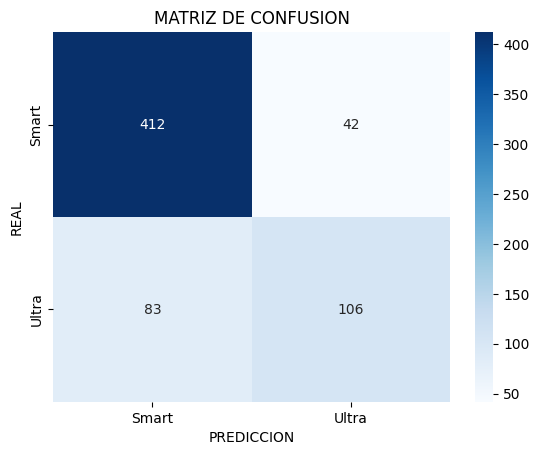

In [53]:
# Calculate the confusion matrix
cm = confusion_matrix(target_test, test_RF_predictions)

# Visualize the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Smart', 'Ultra'], yticklabels=['Smart', 'Ultra'])
plt.xlabel('PREDICCION')
plt.ylabel('REAL')
plt.title('MATRIZ DE CONFUSION')
plt.show()

The results are:
- 412 are the true negatives (predicted 0 and it was 0).
- 106 are true positives (predicted 1 and it was 1).
- 42 are false positives (predicted 1, but it was 0).
- 83 are false negatives (predicted 0, but it was 1).

## 7.- CONCLUSION

Mobile operator Megaline requested a trained model that would recommend one of its newer plans to customers continuing to use legacy plans. It was determined that this was a binary classification task as only the Ultra or Smart plan could be recommended. Therefore, the two models that were trained were a Decision Tree model and a Random Forest.

The features and target data were divided into 3 datasets as follows:

Training dataset (60%)
Validation dataset (20%)
Test dataset (20%)

Multiple models were created with various combinations of hyperparameters. They were trained on the same data and then their accuracy was compared. The Decision Tree and Random Forest models were then tested with higher accuracy using the test data. The accuracy of the best Decision Tree model was calculated to be 79.32% and the accuracy of the best Random Forest model was calculated to be 80.09%. Both models exceed the accuracy threshold of 75%. The best Random Forest model is slightly more accurate than the best Decision Tree model, so that should be the model delivered to Megaline.